## Visualizing gene set enrichment analysis results (clusterProfiler) using dotHeatmap

In [10]:
import os,sys
import matplotlib.pylab as plt
import pickle
import glob
import numpy as np
import matplotlib as mpl
import pandas as pd
mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi']=300
import pickle
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

1.7.2.dev0+g8abf70a.d20240415


### Why do we need a better way to visualize the gene set enrichment analysis result?

<h3>Traditionally, we have to plot lots of barplot or dotplot to visualize the gene set enrichment analysis. For example:</h3>
<img src="https://yulab-smu.top/biomedical-knowledge-mining-book/biomedicalKnowledge_files/figure-html/Barplot-1.png" width="1000"/>
<img src="https://yulab-smu.top/biomedical-knowledge-mining-book/biomedicalKnowledge_files/figure-html/Dotplotcap-1.png" width="1000"/>

<h3>What if we had lots of cell types and performed gene set enrichment analysis for each cell types? It is not a good idea to plot lots of barplot or dotplot in the manuscript.</h3>

In this case, we can merge all the enriched result into one matrix and plot a **dotHeatmap** using [PyComplexHeatmap](https://github.com/DingWB/PyComplexHeatmap)

### Read data

In this example dataset, we have 2 groups and 3 different cell types in each group, and we have already gotten the GO Biological Process (BP), Molecular Function (MF) and KEGG Pathway enrichment result using R package **clusterProfiler** and merged the results into one matrix.

In [11]:
with open("../data/enrichment_analysis_dotHeatmap.pickle",'rb') as f:
    data1,df_row,df_col,colors=pickle.load(f)

In [12]:
data1

,ID,Description,GeneRatio,p.adjust,Count,Group,CellType,EnrichedCategory,-log10(p.adjust),ColID,RowID
0,GO:0003779,actin binding,0.044949,2.453212e-41,186,Group2,CT1,MF,40.610265,Group2-CT1,MF||actin binding
1,GO:0030695,GTPase regulator activity,0.043016,6.744023e-40,178,Group2,CT1,MF,39.171081,Group2-CT1,MF||GTPase regulator activity
2,GO:0060589,nucleoside-triphosphatase regulator activity,0.043016,6.744023e-40,178,Group2,CT1,MF,39.171081,Group2-CT1,MF||nucleoside-triphosphatase regulator activity
3,GO:0005201,extracellular matrix structural constituent,0.021266,5.810239e-35,88,Group2,CT1,MF,34.235806,Group2-CT1,MF||extracellular matrix structural constituent
4,GO:0050839,cell adhesion molecule binding,0.031899,1.612420e-31,132,Group2,CT1,MF,30.792522,Group2-CT1,MF||cell adhesion molecule binding
...,...,...,...,...,...,...,...,...,...,...,...
840,GO:0050905,neuromuscular process,0.010454,1.224335e-07,122,Group2,CT2,BP,6.912100,Group2-CT2,BP||neuromuscular process
1205,GO:0030534,adult behavior,0.009426,6.028861e-06,110,Group2,CT2,BP,5.219765,Group2-CT2,BP||adult behavior
1558,GO:0035019,somatic stem cell population maintenance,0.004799,6.029991e-05,56,Group2,CT2,BP,4.219683,Group2-CT2,BP||somatic stem cell population maintenance
1746,GO:0019827,stem cell population maintenance,0.009854,1.467128e-04,115,Group2,CT2,BP,3.833532,Group2-CT2,BP||stem cell population maintenance


In [13]:
df_row

,EnrichedCategory,Description
RowID,,
MF||actin binding,MF,actin binding
MF||GTPase regulator activity,MF,GTPase regulator activity
MF||nucleoside-triphosphatase regulator activity,MF,nucleoside-triphosphatase regulator activity
MF||extracellular matrix structural constituent,MF,extracellular matrix structural constituent
MF||cell adhesion molecule binding,MF,cell adhesion molecule binding
MF||metal ion transmembrane transporter activity,MF,metal ion transmembrane transporter activity
MF||monoatomic ion channel activity,MF,monoatomic ion channel activity
MF||monoatomic ion gated channel activity,MF,monoatomic ion gated channel activity
MF||gated channel activity,MF,gated channel activity


In [14]:
df_col

,Group,CellType
Group2-CT1,Group2,CT1
Group1-CT2,Group1,CT2
Group1-CT3,Group1,CT3
Group2-CT3,Group2,CT3
Group1-CT4,Group1,CT4
Group1-CT1,Group1,CT1
Group2-CT2,Group2,CT2


### Plot

In [15]:
s_min,s_max=data1.GeneRatio.min(),data1.GeneRatio.max()

In [16]:
data1.loc[data1.GeneRatio==s_min]

,ID,Description,GeneRatio,p.adjust,Count,Group,CellType,EnrichedCategory,-log10(p.adjust),ColID,RowID
3074,GO:0021954,central nervous system neuron development,0.004586,0.027429,42,Group2,CT3,BP,1.561784,Group2-CT3,BP||central nervous system neuron development


In [17]:
data1.loc[data1.GeneRatio==s_max]

,ID,Description,GeneRatio,p.adjust,Count,Group,CellType,EnrichedCategory,-log10(p.adjust),ColID,RowID
1,GO:0045444,fat cell differentiation,0.176471,0.000382,6,Group1,CT1,BP,3.417494,Group1-CT1,BP||fat cell differentiation


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 106.46754159267321
Plotting legends..
Estimated legend width: 23.6375 mm


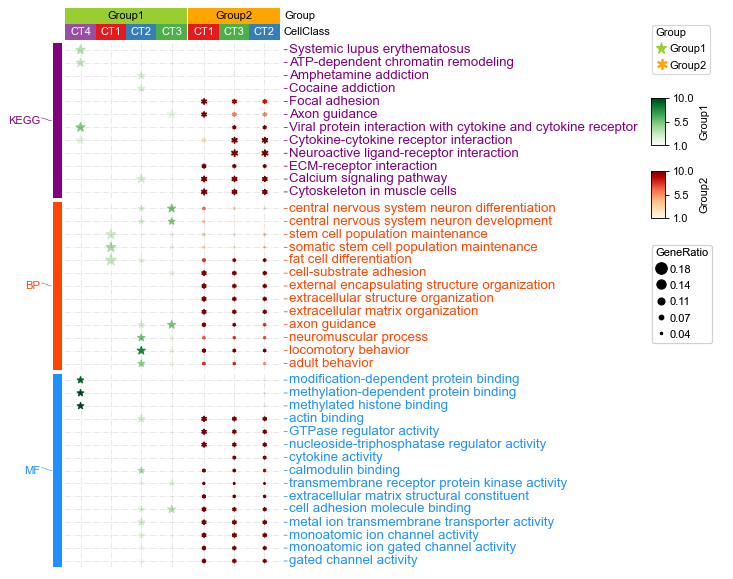

In [18]:
left_ha = HeatmapAnnotation(
                          label=anno_label(df_row.EnrichedCategory, merge=True,rotation=0,colors=colors,relpos=(1,0.8)),
                          Category=anno_simple(df_row.EnrichedCategory,cmap='Set1',
                                           add_text=False,legend=False,colors=colors),
                           axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left','visible':False})
right_ha = HeatmapAnnotation(
                          label=anno_label(df_row.Description, merge=True,rotation=0,relpos=(0,0.5),arrowprops=dict(visible=True),
                                           colors=df_row.assign(color=df_row.EnrichedCategory.map(colors)).set_index('Description').color.to_dict(),
                                          fontsize=12,luminance=0.8,height=2),
                           axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'},
                            orientation='right')

col_ha = HeatmapAnnotation(
                           Group=anno_simple(df_col.Group,cmap='Set1',legend=False,add_text=True,
                                               height=4.5,colors={'Group1':'yellowgreen','Group2':'orange'}),
                           CellClass=anno_simple(df_col.CellType,cmap='Set1',legend=False,add_text=True,
                                                 height=4.5),
                           verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

plt.figure(figsize=(4, 8))
cm = DotClustermapPlotter(data=data1, x='ColID',y='RowID',value='-log10(p.adjust)',c='-log10(p.adjust)',s='GeneRatio',
                          row_cluster=True,col_cluster=True,hue='Group', 
                          cmap={'Group1':'Greens','Group2':'OrRd'},
                          vmin=-1*np.log10(0.1),vmax=-1*np.log10(1e-10),
                          colors={'Group1':'yellowgreen','Group2':'orange'},
                          marker={'Group1':'*','Group2':'$\\ast$'},
                          show_rownames=True,show_colnames=False,row_dendrogram=False,
                          col_names_side='top',#row_names_side='right',
                          xticklabels_kws={'labelrotation': 30, 'labelcolor': 'blue','labelsize':14},
                          top_annotation=col_ha,left_annotation=left_ha,right_annotation=right_ha,
                          spines=False,
                          row_split=df_row.EnrichedCategory, row_split_gap=1,
                          col_split=df_col.Group,col_split_gap=0.5,
                          verbose=1,legend_gap=8,
                          #dot_legend_marker='*',
                          # xlabel=Group,xlabel_side="top",
                          # xlabel_kws=dict(labelpad=8,fontweight='bold'),
                          # xlabel_bbox_kws=dict(facecolor=facecolor)
                         )
# cm.ax_heatmap.grid(which='minor',color='black',linestyle='--',linewidth=1)
for ax in cm.heatmap_axes.ravel():
    ax.grid(axis='both',which='major',color='black',linestyle='dashdot',alpha=0.1)
    # for side in ["top", "left", "bottom"]:
    #     ax.spines[side].set_visible(True)
    #     ax.spines[side].set_color('grey')
    #     ax.spines[side].set_linewidth(1)
    #     ax.spines[side].set_linestyle('--')
# plt.savefig(f"cell_class_dotHeatmap.pdf",bbox_inches='tight')
plt.show()

<h4><span style="color:red">In this example, we used two different kinds of markers and cmap to indicate Group1 and Group2, rows are split by category of enriched terms, sizes of dot/marker indicates gene ratio (The ratio of genes annotated by the GO term in your list to the total number of genes in your list).</span></h4>

### How to select marker:

<img src="https://i.stack.imgur.com/NkAzy.png" width="800"/>